In [0]:
from google.colab import drive
drive.mount('/content/drive')

**<font size='5' color='#ff6666'>Import Library</font>**

In [0]:
#@markdown **<font color='#008000'>Click to import and install**
!rm '/content/clustering' -rf
!git clone 'http://www.github.com/Nak007/clustering.git'

!pip install factor-analyzer
import pandas as pd, numpy as np
from clustering import pca_analysis as pca, cluster as cls
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format =  '{:,.2f}'.format

## **<font size='6' color='#49a8de'>( 1 ) Factor Analysis</font>**

### **<font color='#49a8de'>( 1.1 ) Dataset</font>**
---
Simulate dataset from sklearn

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs( n_samples=1000, n_features=10, centers=4, cluster_std=3, center_box=(-10,10), random_state=100)
X = pd.DataFrame(X, columns=['feature_{0}'.format(n) for n in range(1,11)])

In [5]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,6.98,6.91,-4.01,1.27,-13.42,8.41,2.95,-6.11,10.22,5.42
1,5.04,0.73,-14.71,-3.38,-6.95,8.30,13.93,-6.45,5.35,-1.55
2,1.90,-5.54,-8.94,-9.29,-7.21,9.78,8.09,-7.57,7.12,-4.57
3,-3.05,9.58,3.85,-4.79,-9.93,-1.74,-12.32,-2.97,3.81,-8.05
4,3.11,6.60,-7.54,-3.57,-9.13,12.14,11.00,-7.17,7.37,1.08


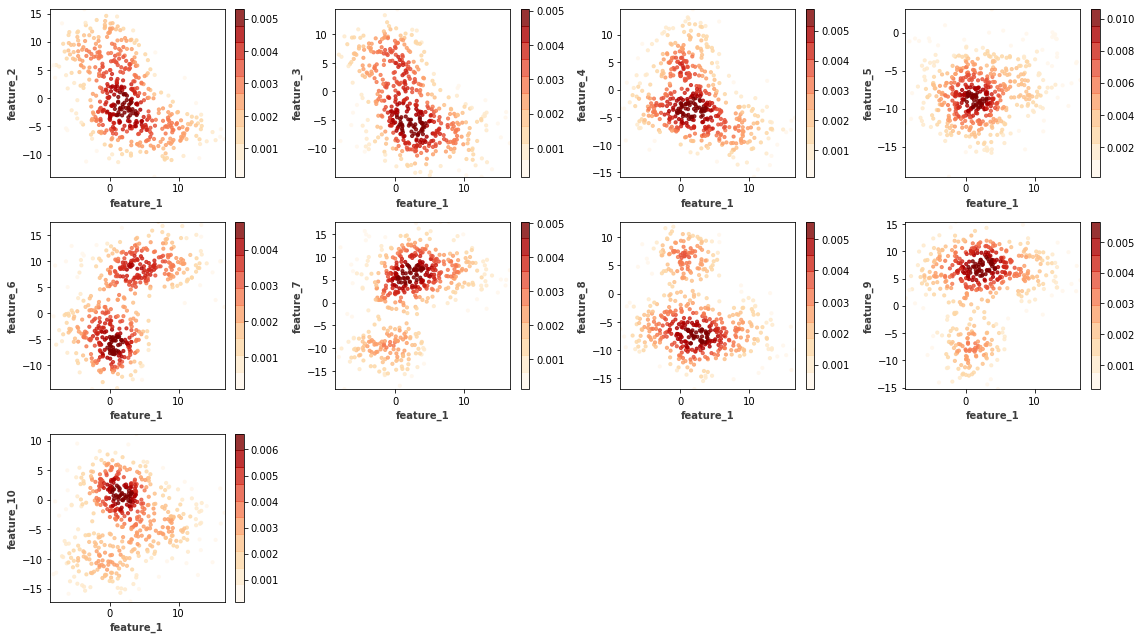

In [6]:
f_plot = pca.plot_factors(0, 0.5, 0, 4)
f_plot.fit(X, 'feature_1', fname=None)

### **<font color='#49a8de'>( 1.2 ) Capping Outliers</font>**

In [0]:
m = pca.outliers(method='gamma')
m.fit(X)
capped_X = pd.DataFrame(m.capped_X)

In [0]:
# list of lower and upper bounds
#pd.DataFrame(m.limit_).head()

### **<font color='#49a8de'>( 1.3 ) Standardization</font>**

In [0]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler

In [0]:
# method: {'shift_scale','robust','q_normal','q_uniform'}
X_std = QuantileTransformer(output_distribution='normal').fit_transform(capped_X)
#X_std = StandardScaler().fit_transform(capped_X)
X_std = pd.DataFrame(X_std,columns=list(capped_X))

### **<font color='#49a8de'>( 1.3.1 ) Principal Component Analysis</font>**

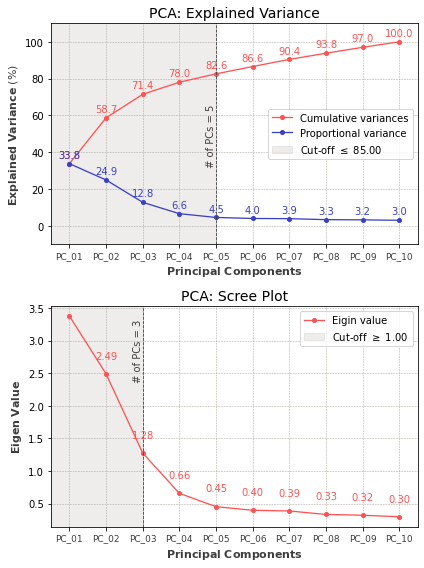

In [46]:
pca_ = pca.principal_components(85, 1)
pca_.fit(X_std)
pca_.plot(fname=None)

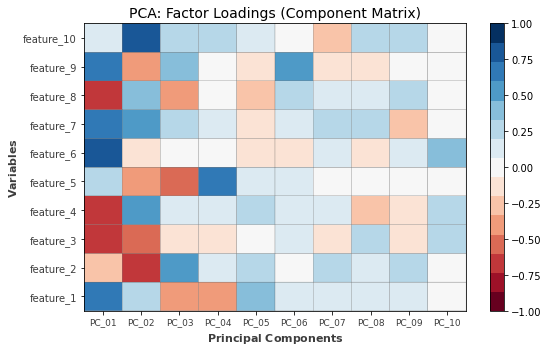

In [47]:
pca_.plot_factor_loadings(fname=None)

In [48]:
pc_score = pca_.transform(X_std, n_comps=8)
pc_score.head(4)

,PC_01,PC_02,PC_03,PC_04,PC_05,PC_06,PC_07,PC_08
0,0.98,1.20,2.02,-0.86,0.65,0.47,-0.33,0.15
1,4.44,2.37,0.44,0.55,-0.03,-0.16,1.15,-0.40
2,3.57,-0.18,-0.34,0.01,-0.66,-0.26,-0.08,-0.07
3,-3.36,-2.59,0.61,-0.44,-0.33,-0.46,-0.08,-0.02


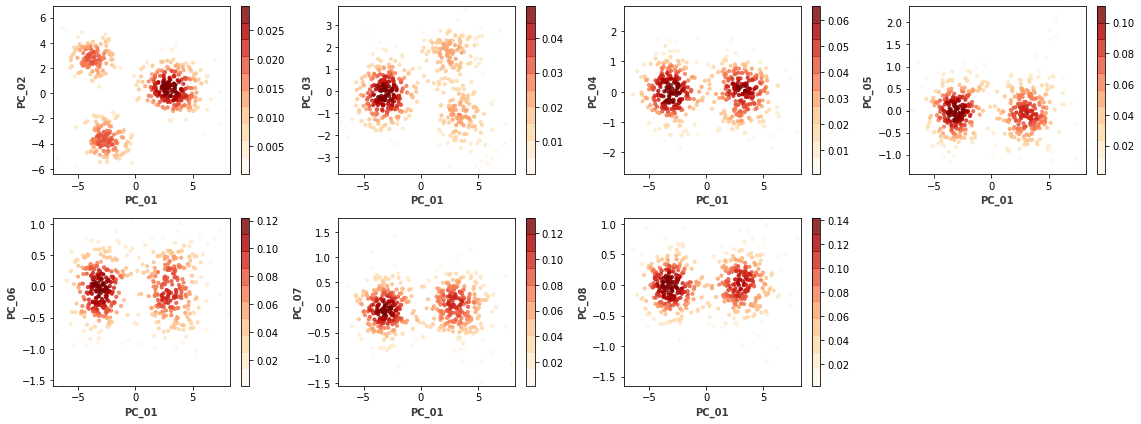

In [49]:
f_plot = pca.plot_factors(0, 0.5, 0, 4)
f_plot.fit(pc_score,'PC_01',fname=None)

### **<font color='#49a8de'>( 1.3.2 ) Factor Rotation</font>**

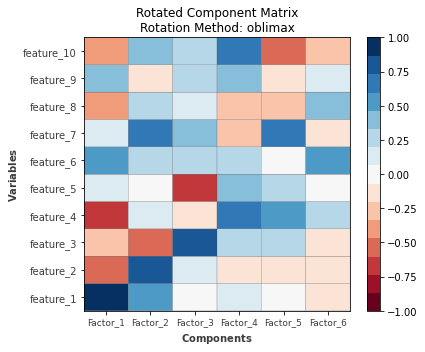

In [70]:
rotated_pc = pca.factor_analysis(pca_.loadings)
rotated_pc.fit(6,'oblimax')
rotated_pc.plot(fname=None)

In [71]:
factor_score = rotated_pc.transform(X_std)
factor_score.head(4)

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,0.36,1.76,1.87,1.47,-1.42,-0.10
1,1.87,3.50,-1.82,-1.05,0.56,0.15
2,2.53,0.00,-0.34,-0.79,-0.17,0.15
3,-2.36,-1.51,0.36,-0.96,-1.05,0.26


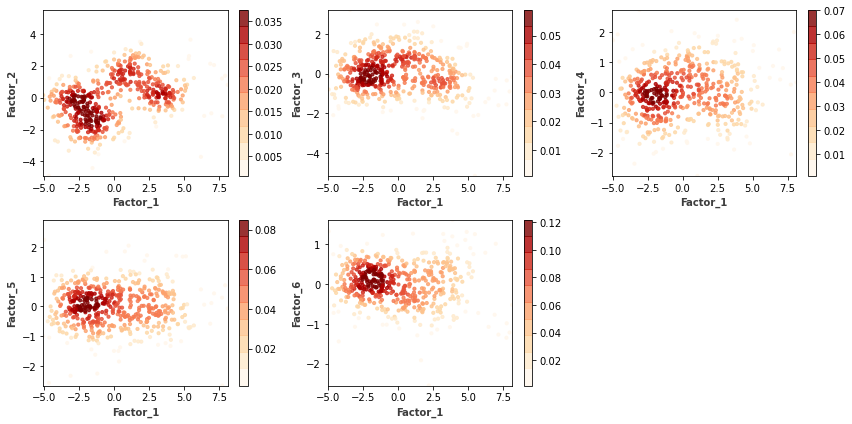

In [72]:
f_plot = pca.plot_factors(0, 0.5, 0, 3)
f_plot.fit(factor_score, 'Factor_1', fname=None)

### **<font color='#49a8de'>( 1.4 ) PCA Dataset</font>**

In [0]:
kwargs = dict(how='left', left_index=True, right_index=True)
df = capped_X.merge(pc_score,**kwargs).merge(factor_score,**kwargs)

In [74]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,PC_01,PC_02,PC_03,PC_04,PC_05,PC_06,PC_07,PC_08,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,6.98,6.91,-4.01,1.27,-13.42,8.41,2.95,-6.11,10.22,5.42,0.98,1.20,2.02,-0.86,0.65,0.47,-0.33,0.15,0.36,1.76,1.87,1.47,-1.42,-0.10
1,5.04,0.73,-14.71,-3.38,-6.95,8.30,13.93,-6.45,5.35,-1.55,4.44,2.37,0.44,0.55,-0.03,-0.16,1.15,-0.40,1.87,3.50,-1.82,-1.05,0.56,0.15
2,1.90,-5.54,-8.94,-9.29,-7.21,9.78,8.09,-7.57,7.12,-4.57,3.57,-0.18,-0.34,0.01,-0.66,-0.26,-0.08,-0.07,2.53,0.00,-0.34,-0.79,-0.17,0.15
3,-3.05,9.58,3.85,-4.79,-9.93,-1.74,-12.32,-2.97,3.81,-8.05,-3.36,-2.59,0.61,-0.44,-0.33,-0.46,-0.08,-0.02,-2.36,-1.51,0.36,-0.96,-1.05,0.26
4,3.11,6.60,-7.54,-3.57,-9.13,12.14,11.00,-7.17,7.37,1.08,3.08,0.54,1.35,0.18,-0.07,-0.11,0.55,0.22,1.11,2.42,0.90,0.15,0.12,0.20


## **<font size="6" color='#66a490'>Clustering with PCA</font>**

Select features ==> Principal Components

In [0]:
features = df.columns[df.columns.str.contains('PC')]

### **<font color='#66a490'>( 1.1 ) KMeans Clustering</font>**

In [0]:
m1 = cls.cluster_kmeans(p_samples=0.2,n_bootstraps=50,**dict(random_state=10))
m1.fit(df[features])

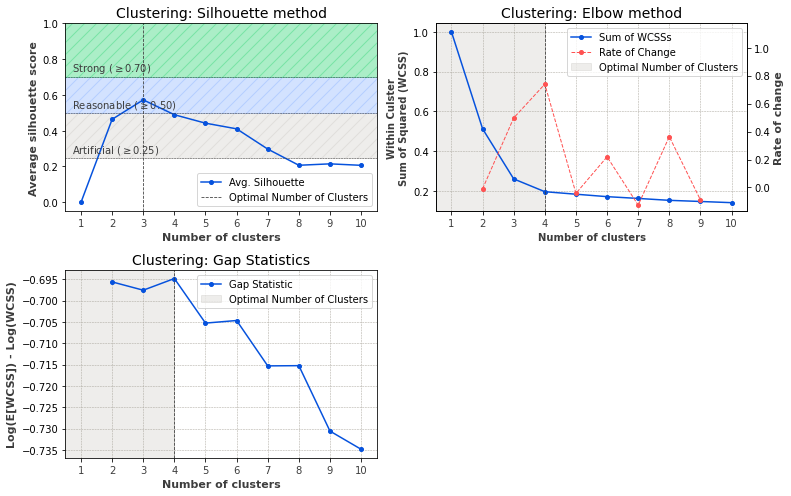

In [77]:
cls.cluster_results(m1.data)

### **<font color='#66a490'>( 1.2 ) Hierarchical clustering</font>**

In [0]:
m2 = cls.cluster_linkage()
m2.fit(df[features])

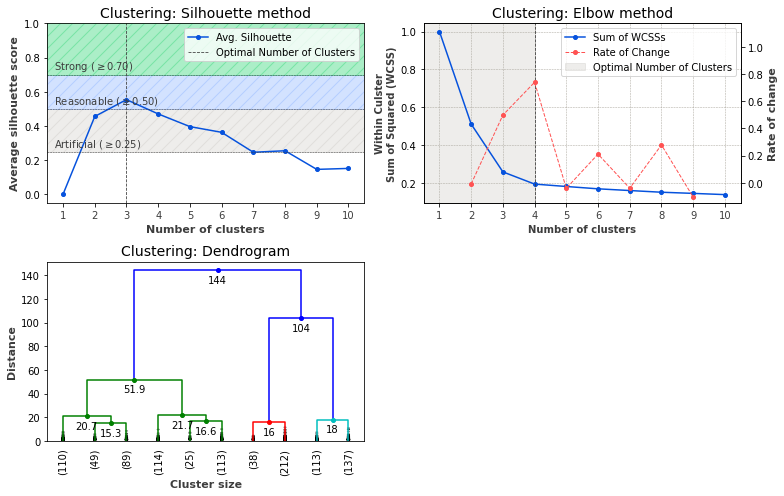

In [79]:
cls.cluster_results(m2.data)

### **<font color='#66a490'>( 2 ) Clustering Analysis</font>**

In [0]:
labels = m1.data['labels'][:,3]
colors = cls.matplotlib_cmap('coolwarm_r',np.unique(labels).shape[0])

#### **<font color='#66a490'>( 2.1 ) Pie chart</font>**
---
Proportion of respective clusters

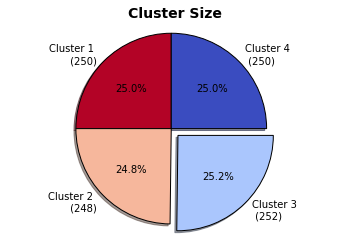

In [81]:
fig, axis = plt.subplots()
cls.cluster_pie(axis, labels, colors=colors)
axis.set_title('Cluster Size',fontsize=14, fontweight='bold')
plt.show()

#### **<font color='#66a490'>( 2.2 ) Radar chart</font>**
---
Observe differences among clusters

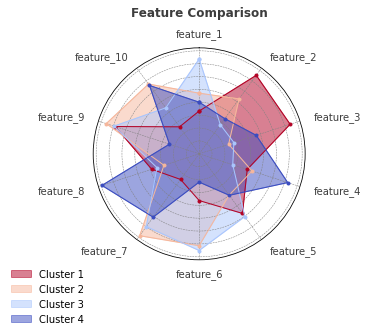

In [82]:
r1 = cls.radar_plot(**dict(marker='o', ms=3))
c = [n for n in list(df) if str(n).find('feature')>-1]
r1.fit(df[c], labels, q=50, title='Feature Comparison\n')

#### **<font color='#66a490'>( 2.3 ) Scatter chart</font>**
---
Use pairwise comparison to observe interaction of variables

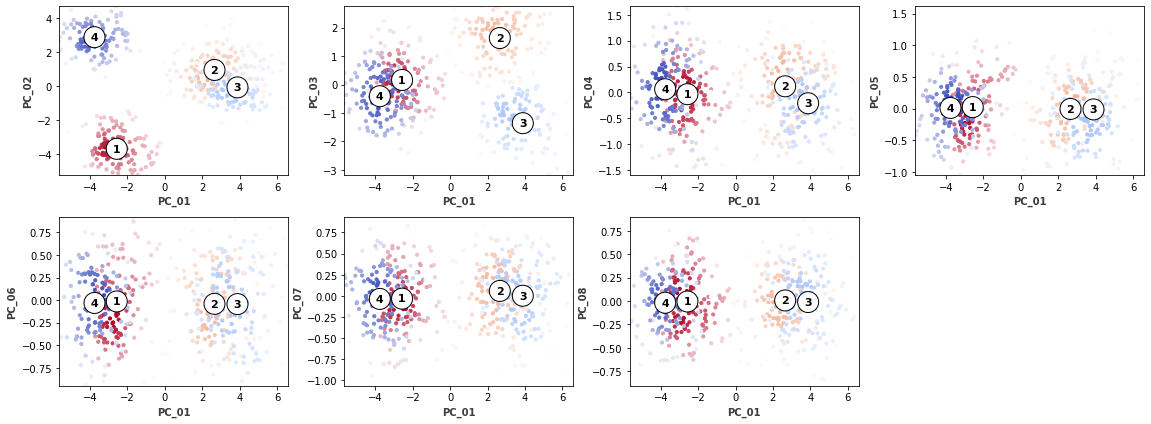

In [83]:
p1 = cls.cluster_factors(n_columns=4, frac=0.3)
c = [n for n in list(df) if str(n).find('PC')>-1]
p1.fit(df[c], labels, a=1, method='scatter',colors=colors)

#### **<font color='#66a490'>( 2.4 ) PDF chart</font>**
---
Use Probability Density as well as Maximum Likelihood Estimators to oberve how each cluster form its own distribution 

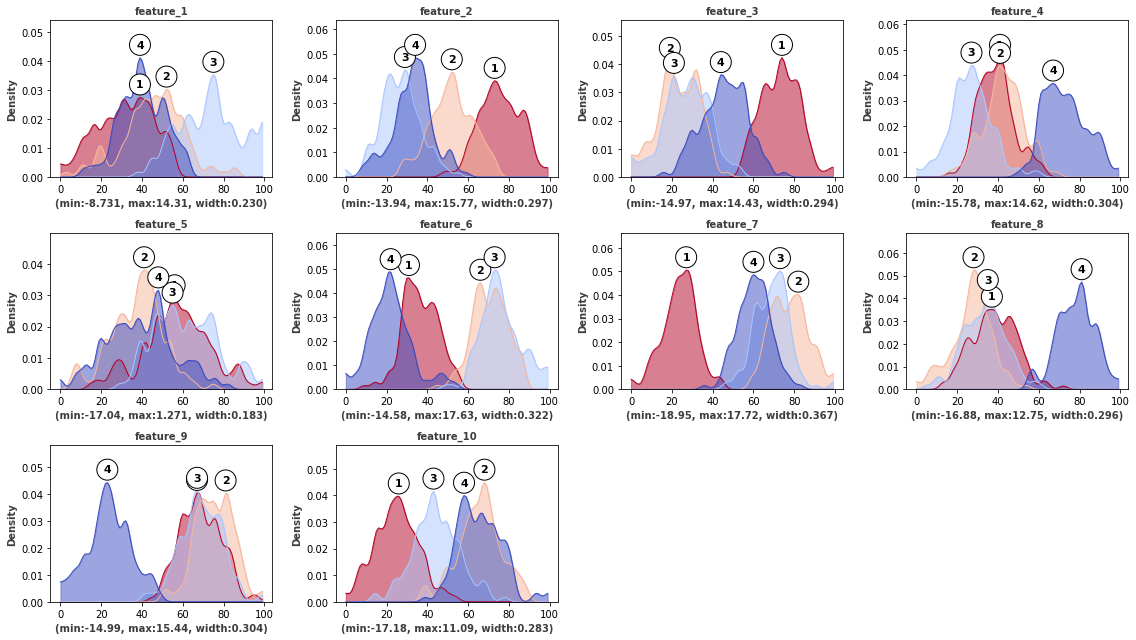

In [84]:
c = [n for n in list(df) if str(n).find('feature')>-1]
p1.fit(df[c], labels, method='hist', sigma=2, colors=colors)

## **<font size="6" color='#ff0050'>Clustering with Factor Rotation</font>**

Select features ==> Factor

In [0]:
features = df.columns[df.columns.str.contains('Factor')]

### **<font color='#ff0050'>( 1.1 ) KMeans Clustering</font>**

In [0]:
m1 = cls.cluster_kmeans(p_samples=0.2,n_bootstraps=50,**dict(random_state=10))
m1.fit(df[features])

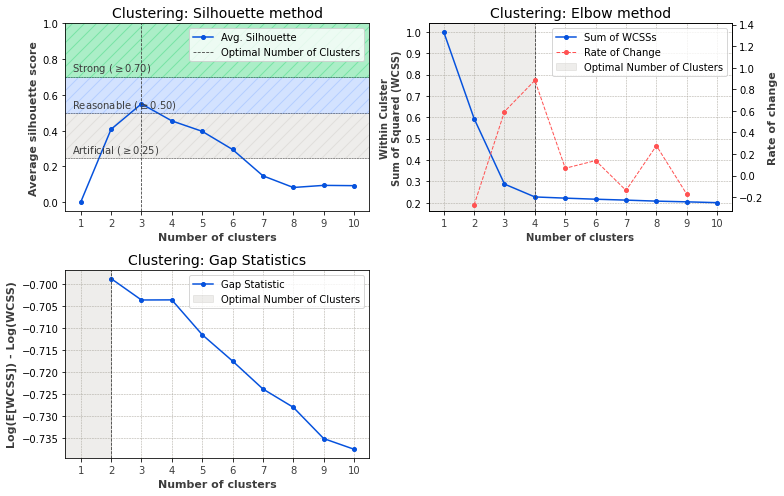

In [97]:
cls.cluster_results(m1.data)

### **<font color='#ff0050'>( 1.2 ) Hierarchical clustering</font>**

In [0]:
m2 = cls.cluster_linkage()
m2.fit(df[features])

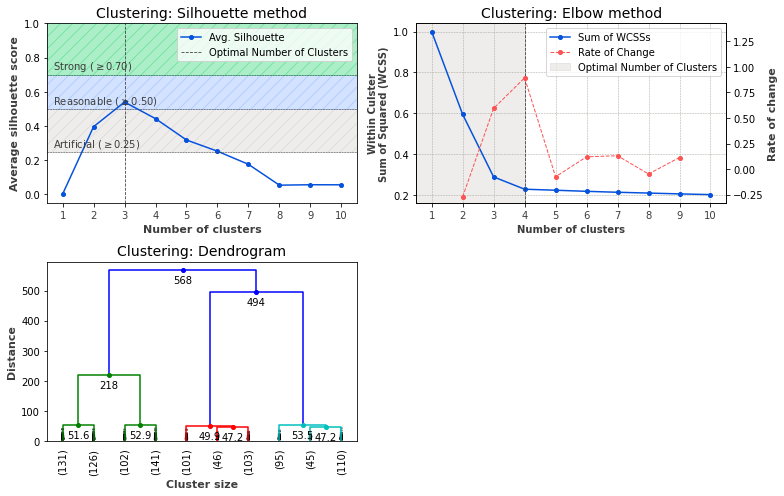

In [99]:
cls.cluster_results(m2.data)

### **<font color='#ff0050'>( 2 ) Clustering Analysis</font>**

In [0]:
labels = m1.data['labels'][:,3]
colors = cls.matplotlib_cmap('coolwarm_r',np.unique(labels).shape[0])

#### **<font color='#ff0050'>( 2.1 ) Pie chart</font>**
---
Proportion of respective clusters

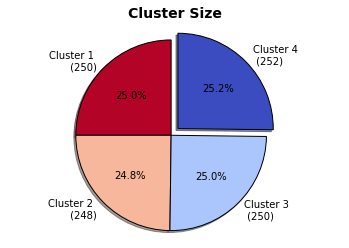

In [101]:
fig, axis = plt.subplots()
cls.cluster_pie(axis, labels, colors=colors)
axis.set_title('Cluster Size',fontsize=14, fontweight='bold')
plt.show()

#### **<font color='#ff0050'>( 2.2 ) Radar chart</font>**
---
Observe differences among clusters

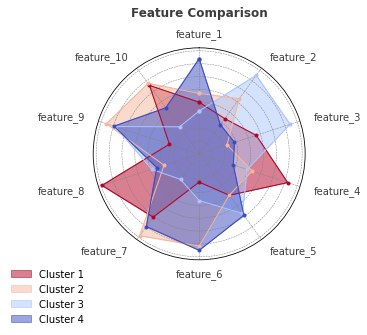

In [102]:
r1 = cls.radar_plot(**dict(marker='o', ms=3))
c = [n for n in list(df) if str(n).find('feature')>-1]
r1.fit(df[c], labels, q=50, title='Feature Comparison\n')

#### **<font color='#ff0050'>( 2.3 ) Scatter chart</font>**
---
Use pairwise comparison to observe interaction of variables

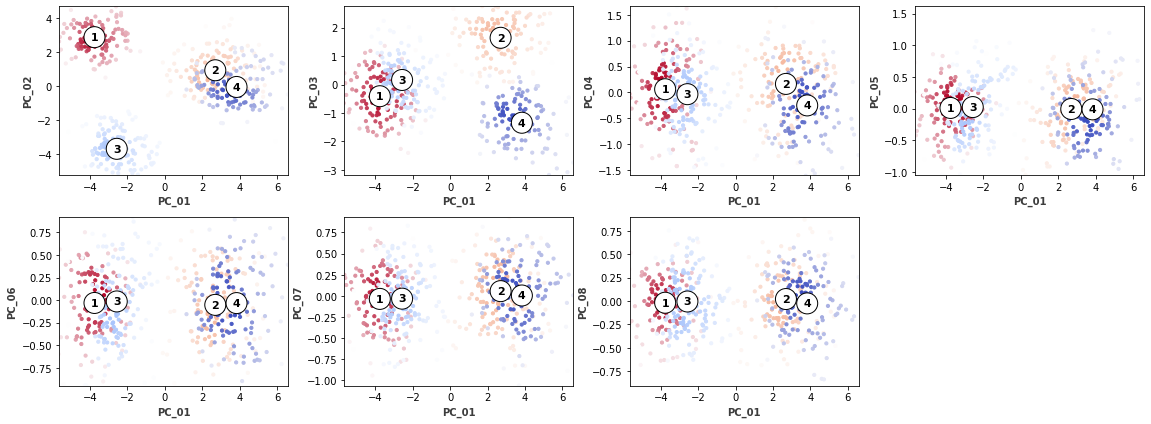

In [103]:
p1 = cls.cluster_factors(n_columns=4, frac=0.3)
c = [n for n in list(df) if str(n).find('PC')>-1]
p1.fit(df[c], labels, a=1, method='scatter',colors=colors)

#### **<font color='#ff0050'>( 2.4 ) PDF chart</font>**
---
Use Probability Density as well as Maximum Likelihood Estimators to oberve how each cluster form its own distribution 

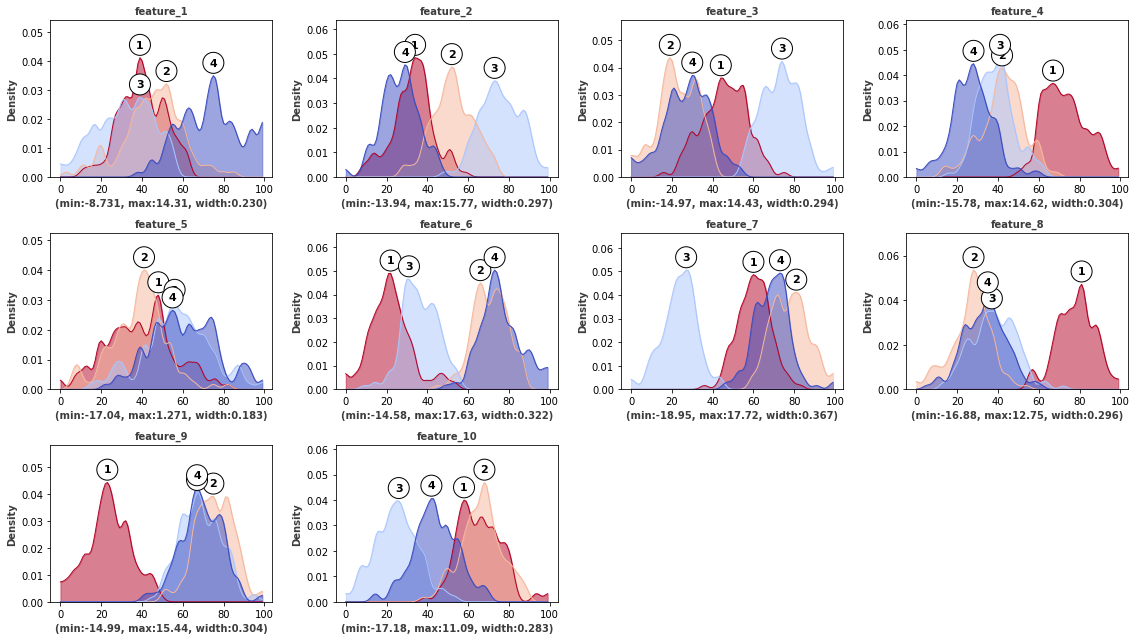

In [104]:
c = [n for n in list(df) if str(n).find('feature')>-1]
p1.fit(df[c], labels, method='hist', sigma=2, colors=colors)